# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.


### Описание признаков
   - **name**: Название автомобиля (марка и модель),
   - **company**: Компания-производитель,
   - **year**: Год выпуска автомобиля,
   - **Price**: Цена автомобиля,
   - **kms_driven**: Пробег автомобиля в километрах,
   - **fuel_type**: Тип топлива, используемого автомобилем

### Исследование данных

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [58]:
data=pd.read_csv('dataset/CAR.csv')


In [59]:
data.head(10)

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55 SE USA,Toyota,2015.0,15800$,150 000 km,Hybrid
1,1,Toyota Land Cruiser 200,Toyota,2015.0,47000$,145 000 km,Petrol
2,2,Toyota Camry 70 XSE,Toyota,2019.0,20500$,180 246 km,Petrol
3,3,Toyota Highlander IV (U70),Toyota,2019.0,45300$,108 000 km,Hybrid
4,4,Toyota Crown XVI (S235),Toyota,2023.0,51500$,7 750 km,Hybrid
5,5,Toyota Sequoia I Restyling,Toyota,2004.0,23500$,167 000 km,Petrol
6,6,Toyota RAV4 V (XA50),Toyota,2021.0,37500$,56 000 km,Hybrid
7,7,Toyota Avalon,Toyota,2019.0,30000$,27 000 km,Hybrid
8,8,Toyota Crown,Toyota,2020.0,35500$,57 750 km,Petrol
9,9,Toyota Sequoia,Toyota,2022.0,98500$,12 000 km,Petrol


In [60]:
data.shape

(786, 7)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  786 non-null    int64  
 1   name        786 non-null    object 
 2   company     785 non-null    object 
 3   year        783 non-null    float64
 4   Price       780 non-null    object 
 5   kms_driven  785 non-null    object 
 6   fuel_type   781 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 43.1+ KB


In [62]:
backup=data.copy()

In [63]:
data.describe()

,Unnamed: 0,year
count,786.000000,783.000000
mean,395.134860,2014.315453
std,234.561305,6.591582
min,0.000000,1990.000000
25%,195.250000,2011.000000
50%,391.500000,2016.000000
75%,585.000000,2019.000000
max,859.000000,2024.000000


## Очистка данных

In [64]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       1
year          3
Price         6
kms_driven    1
fuel_type     5
dtype: int64

In [65]:
data = data.dropna()

In [66]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [67]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
781    False
782    False
783    False
784    False
785    False
Length: 770, dtype: bool

In [68]:
data['Price'] = data['Price'].str.replace('$', '').astype(int)

In [69]:
data['kms_driven'] = data['kms_driven'].str.replace(' km', '').str.replace(' ', '').astype(int)


In [70]:
data['year'] = data['year'].astype(int)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 785
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  770 non-null    int64 
 1   name        770 non-null    object
 2   company     770 non-null    object
 3   year        770 non-null    int32 
 4   Price       770 non-null    int32 
 5   kms_driven  770 non-null    int32 
 6   fuel_type   770 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 39.1+ KB


In [72]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [73]:
data=data.reset_index(drop=True)

In [74]:
data

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55,Toyota,2015,15800,150000,Hybrid
1,1,Toyota Land Cruiser,Toyota,2015,47000,145000,Petrol
2,2,Toyota Camry 70,Toyota,2019,20500,180246,Petrol
3,3,Toyota Highlander IV,Toyota,2019,45300,108000,Hybrid
4,4,Toyota Crown XVI,Toyota,2023,51500,7750,Hybrid
...,...,...,...,...,...,...,...
765,855,Honda Fit,Honda,2003,5718,212000,Petrol
766,856,Honda Fit,Honda,2003,5718,212000,Petrol
767,857,Honda Fit,Honda,2003,5718,212000,Petrol
768,858,Honda Fit,Honda,2003,5718,212000,Petrol


In [75]:
#data.to_csv('dataset/cleaned_data_cars.csv',index = False)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  770 non-null    int64 
 1   name        770 non-null    object
 2   company     770 non-null    object
 3   year        770 non-null    int32 
 4   Price       770 non-null    int32 
 5   kms_driven  770 non-null    int32 
 6   fuel_type   770 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 33.2+ KB


In [77]:
data.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,770.000000,770,770,770.000000,770.000000,770.000000,770
unique,NaN,293,6,NaN,NaN,NaN,7
top,NaN,Honda Fit,Honda,NaN,NaN,NaN,Petrol
freq,NaN,140,227,NaN,NaN,NaN,588
mean,391.067532,NaN,NaN,2014.310390,36373.188312,99603.315584,NaN
std,235.148395,NaN,NaN,6.604646,48173.326688,82104.788991,NaN
min,0.000000,NaN,NaN,1990.000000,2500.000000,17.000000,NaN
25%,191.250000,NaN,NaN,2011.000000,12000.000000,35050.000000,NaN
50%,383.500000,NaN,NaN,2016.000000,25600.000000,70000.000000,NaN
75%,577.750000,NaN,NaN,2019.000000,45575.000000,150000.000000,NaN


In [78]:
#data=data[data['Price']<60000]

In [79]:
data['company'].unique()

array(['Toyota', 'Honda', 'Mercedes-Benz', 'Lexus', 'BMW', 'Hyundai'],
      dtype=object)

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
### Кодирование признаков


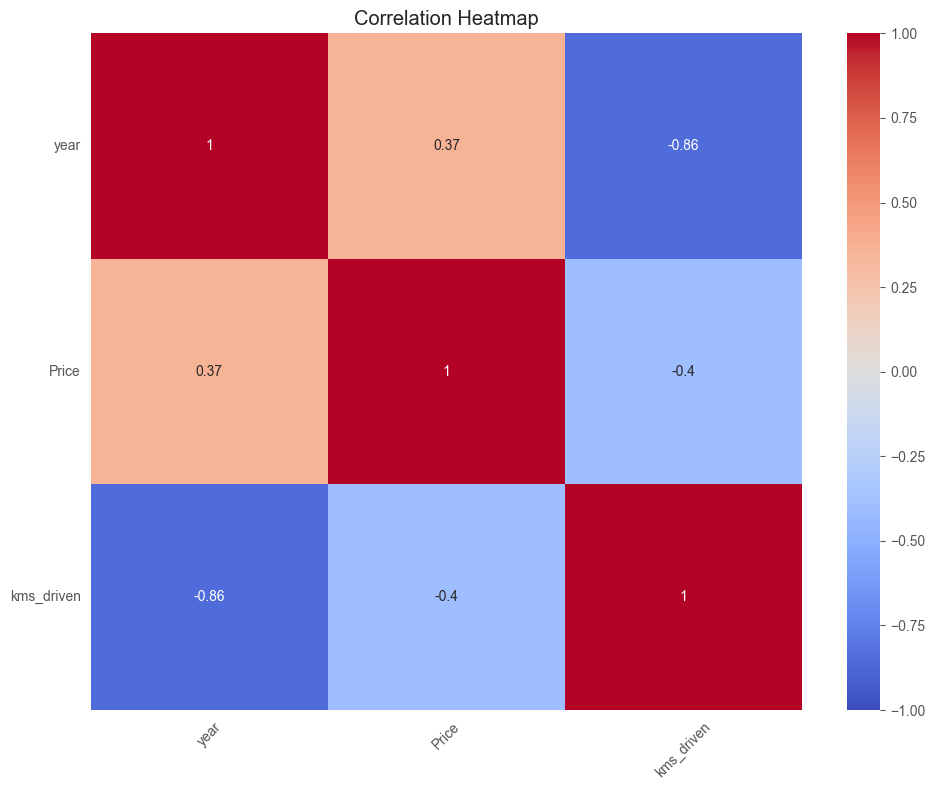

In [82]:
# Вычисление корреляций
numeric_cols = ['year', 'Price', 'kms_driven']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Построение модели 

In [83]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [84]:
X

,name,company,year,kms_driven,fuel_type
0,Toyota Camry 55,Toyota,2015,150000,Hybrid
1,Toyota Land Cruiser,Toyota,2015,145000,Petrol
2,Toyota Camry 70,Toyota,2019,180246,Petrol
3,Toyota Highlander IV,Toyota,2019,108000,Hybrid
4,Toyota Crown XVI,Toyota,2023,7750,Hybrid
...,...,...,...,...,...
765,Honda Fit,Honda,2003,212000,Petrol
766,Honda Fit,Honda,2003,212000,Petrol
767,Honda Fit,Honda,2003,212000,Petrol
768,Honda Fit,Honda,2003,212000,Petrol


In [85]:
y.shape

(770,)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [89]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [90]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [91]:
lr=LinearRegression()

In [92]:
pipe=make_pipeline(column_trans,lr)

In [93]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Sequoia I', 'Toyota Supra 2.0', 'Toyota Supra 3.0',
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Lexus', 'Mercedes-Benz', 'Toyota'],
      dtype=object),
                                                                            array([' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen', 'LPG',
       'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [94]:
y_pred=pipe.predict(X_test)

In [95]:
r2_score(y_test,y_pred)

0.42320415798027133

In [96]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [97]:
np.argmax(scores)

891

In [98]:
scores[np.argmax(scores)]

0.6842143084515326

In [99]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota Camry 75','Toyota',2023,30500,'Petrol']).reshape(1,5)))

array([46751.8155174])

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.6842143084515326

## RandomForest

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))


In [103]:
rf = RandomForestRegressor(random_state=42)


In [104]:
pipe = make_pipeline(column_trans, rf)


In [105]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Lexus', 'Mercedes-Benz', 'Toyota'],
      dtype=object),
                                                                            array([' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen', 'LPG',
       'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [106]:
y_pred = pipe.predict(X_test)


In [107]:
r2 = r2_score(y_test, y_pred)
r2


-4.980368399263105

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [112]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(random_state=42, verbose=0)
pipe_catboost = Pipeline(steps=[('preprocessor', column_trans), ('regressor', catboost)])
pipe_catboost.fit(X_train, y_train)
y_pred_catboost = pipe_catboost.predict(X_test)
r2_catboost = r2_score(y_test, y_pred_catboost)
print(f'R^2 for CatBoostRegressor: {r2_catboost}')




R^2 for XGBRegressor: -17.119063744367228


In [46]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [47]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda Fit','Honda',2003,212000,'Petrol']).reshape(1,5)))

array([1434.13838723])

In [192]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'BMW 318d Touring',
       'BMW 318i Touring', 'BMW 320d Gran', 'BMW 320d xDrive', 'BMW 320i',
       'BMW 320i Touring', 'BMW 330d Touring', 'BMW 330e',
       'BMW 330e Plug-in', 'BMW 330i', 'BMW 330i M', 'BMW 330i Touring',
       'BMW 330i xDrive', 'BMW 335d', 'BMW 420d Gran', 'BMW 420i Gran',
       'BMW 430i Convertible', 'BMW 520d', 'BMW 520d Touring',
       'BMW 520d xDrive', 'BMW 520i', 'BMW 530d Touring',
       'BMW 530d xDrive', 'BMW 530e Plug-in', 'BMW 530i X', 'BMW 535i',
       'BMW 540i X', 'BMW 640d Gran', 'BMW 640i Gran', 'BMW 730 LD',
       'BMW 730d', 'BMW 730i', 'BMW 740Le xDrive', 'BMW 740i',
       'BMW 760Li X', 'BMW M2', 'BMW M2 Competition', 'BMW M235i',
       'BMW M3', 'BMW M3 Competi